# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

(array([  8.,  55., 142., 254., 235., 164., 108.,  24.,   8.,   2.]),
 array([ 2. ,  3.9,  5.8,  7.7,  9.6, 11.5, 13.4, 15.3, 17.2, 19.1, 21. ]),
 <BarContainer object of 10 artists>)

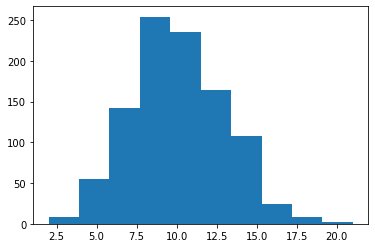

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lam, n = 10, 1000
x = np.random.poisson(lam=lam, size=n)
plt.hist(x)

# mean of Poisson(lam) = variance of Poisson(lam) = lam
# so we espect majority of values to fall into the 
# 10 +- 3 bin and that's what we get in the histogram below

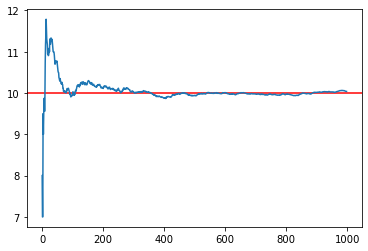

In [15]:
xhat = [sum(x[: i]) / i for i in range(1, len(x))]
plt.axhline(y=lam, color='r')
plt.plot(xhat)

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

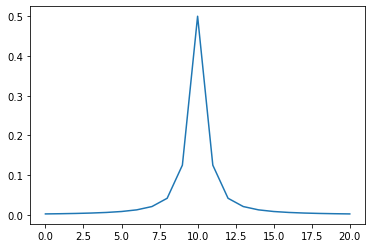

In [16]:
def f(k: int):
    if k == 0:
        return 1 / 2
    return 1 / (4 * abs(k) * (abs(k) + 1))

plt.plot([f(k) for k in range(-10, 11)])


**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

### Argue that these formulas indeed describe a discrete distribution.

$\sum_{k=-\infty}^\infty P(Y = k)$  
Both sums below are convergent, so this step is valid  
$= \sum_{k=-\infty}^{-1}\frac{1}{-k(-k+1)(-k+2)} + \frac{1}{2} + \sum_{k=1}^{\infty} \frac{1}{k(k+1)(k+2)}$  
$= \sum_{k=1}^{\infty}\frac{1}{k(k+1)(k+2)} + \frac{1}{2} + \sum_{k=1}^{\infty} \frac{1}{k(k+1)(k+2)}$  
$= \frac{1}{2} + 2\sum_{k=1}^{\infty} \frac{1}{k(k+1)(k+2)}$  
Decomposing the summand to partial fractions:  
$= \frac{1}{2} + 2\sum_{k=1}^{\infty} \big(\frac{1/2}{k} + \frac{-1}{k+1} + \frac{1/2}{k+2}\big)$  
Let $a_k = \frac{1}{k}$. Then:  
$= \frac{1}{2} + 2\sum_{k=1}^{\infty} \big(\frac{1}{2}a_{k} -a_{k+1} + \frac{1}{2}a_{k+2}\big)$  
Let's count how many times each $a_i$ will be included in the sum:  
$= \frac{1}{2} + 2\Big(\frac{1}{2}a_1 -\frac{1}{2}a_2 + \sum_{k=3}^{\infty} \big(\frac{1}{2} - 1 + \frac{1}{2}\big)\Big)$  
We proved this sum is telescopic, so:  
$= \frac{1}{2} + 2\Big(\frac{1}{2}a_1 -\frac{1}{2}a_2 + \sum_{k=3}^{\infty} \big(\frac{1}{2} - 1 + \frac{1}{2}\big)\Big)$  
$= \frac{1}{2} + \big(a_1 - a_2 \big)$  
$= \frac{1}{2} + \frac{1}{1} - \frac{1}{2}$  
$=1$  
So finally:  
$\sum_{k=-\infty}^\infty P(Y = k) = 1$  
And obviously the set of integers $k=-\infty .. \infty$ is countable, so the distribution is indeed discrete.  
  



### Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).

$EY = \sum_{k=-\infty}^\infty kP(Y = k)$  
Both sums below are convergent, so this step is valid  
$= \sum_{k=-\infty}^{-1}\frac{k}{-k(-k+1)(-k+2)} + 0 + \sum_{k=1}^{\infty} \frac{k}{k(k+1)(k+2)}$  
$= \sum_{k=1}^{\infty}\frac{-1}{(k+1)(k+2)} + \sum_{k=1}^{\infty} \frac{1}{(k+1)(k+2)}$  
$=0$  
Now variation:  
$Var Y = E(Y-EY)^2$  
Using $EY=0$:  
$Var Y = E(Y^2)$  
But $Y \in \Z$, so $Y^2 \in \Z_{\geq 0}$, so:  
$Var Y = \sum_{k=0}^{\infty}kP(Y^2=k)$  
But $P(Y^2=k) = 0$ for $k$ not a perfect square, so:  
$Var Y = \sum_{k=0}^{\infty}k^2P(Y^2=k^2)$  
$Var Y = 0 * \frac{1}{2} + \sum_{k=1}^{\infty}k^2 P(Y=\pm k)$  
$Var Y = \sum_{k=1}^{\infty}k^2 (P(Y=k) + P(Y=-k))$  
$Var Y = \sum_{k=1}^{\infty}k^2 2 P(Y=k)$  
$Var Y = \sum_{k=1}^{\infty}k^2 \frac{2}{k(k+1)(k+2)}$  
$Var Y = 2\sum_{k=1}^{\infty}\frac{k}{(k+1)(k+2)}$  
$Var Y > 2\sum_{k=1}^{\infty}\frac{k}{(k)(k+2)}$  
$Var Y > 2\sum_{k=1}^{\infty}\frac{1}{k+2}$  
$Var Y > 2\sum_{k=1}^{\infty}\frac{1}{k}$  
But here the right-hand side isn't convergent, so the variance doesn't exist

### Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.

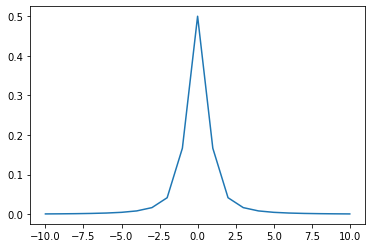

In [17]:
import numpy as np
import matplotlib.pyplot as plt
@np.vectorize
def f(k: int) -> float:
  if k == 0: return 0.5
  k = abs(k)
  return 1 / (k * (k + 1) * (k + 2))

xs = list(range(-10, 11))
ys = f(xs)
plt.plot(xs, ys)

### Write a function that samples from $Y$'s distribution.

In [18]:
from random import random
def Y():
  # first, draw the sign
  sign = 1 if random() < 0.5 else -1
  
  # then draw the abs(Y)
  # let X ~ U([0,1))
  # P(Y = k) = P(X \in [x_k, x_{k+1}))
  # x_0 = 0, x_1 = 0.5
  # for k >= 1: x_{k+1} - x_k = 2 / (k(k+1)(k+2))
  # then x_\infty = 1/2 + 2 \sum_1^\infty 1/(k(k+1)(k+2))
  # = 1/2 + 2 * 1/4 = 1. correct! that's what we want
  # we're just gonna draw X and then binsearch to find the correct k
  
  # for n>0: x_n = 1/2 + 2 \sum_1^{n-1} 1/(k(k+1)(k+2))
  # https://www.wolframalpha.com/input/?i=sum+1%2F%28k*%28k%2B1%29*%28k%2B2%29%29%2C+k%3D1+to+n-1
  # for n=0: x_n = 0
  # for n>0: x_n = 1/2 + 2 * (n^2+n-2) / (4n(n+1))

  def x(n: int) -> float:
    return 0 if n == 0 else 0.5 + 2 * (n * n + n - 2) / (4 * n * (n + 1))

  rnd = random()

  # set lower bound on k
  l = 0
  # find upper bound on k
  r = 1
  while x(r) < rnd:
    r *= 2
  
  # binary search for k
  # invariant: x(l) <= rnd <= x(r)
  while l < r - 1:
    mid = l + (r - l) // 2
    
    if x(mid) < rnd:
      l = mid
    else:
      r = mid - 1
    
  # print(l, r)
  assert l == r or l == r - 1
  result = l
  return sign * result

### Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.

In [19]:
N = 10000
ys = [Y() for _ in range(N)]

### For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 

In [20]:
ybars = [sum(ys[: i]) / i for i in range(1, N + 1)]

### Plot the values of $\bar{y}_i$. Does it look like the series converges?

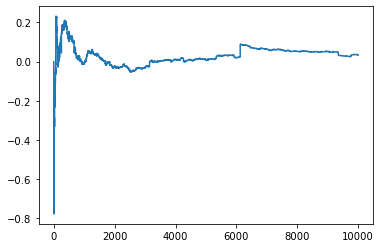

In [21]:
plt.plot(ybars)
# seems convergent

### For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.

In [22]:
yhats = [np.median(ys[: i]) for i in range(1, N + 1)]

### Plot the values of $\hat{y}_i$.

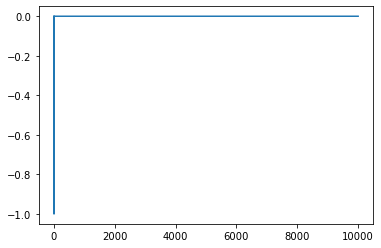

In [23]:
plt.plot(yhats)

### Discuss the results obtained.

We got approximately what we expected - median around 0, convergent partial averages, etc.